In [1]:
import string
import random
from IPython.display import display, clear_output
from PIL import Image, ImageOps, ImageDraw, ImageFont, ImageChops
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from ipywidgets import interactive, HBox, VBox
from img_processing import preprocess_img, DITHER_MODES
from non_mono_char_art_utils import *
from non_mono_char_art_algorithms import *
from generate_char_palette import *
from mono_char_art_conversion_wxh import *
from skimage import metrics

In [2]:
FONT = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 22)

CHAR_SET = get_asciis()

IMG_PATH = "imgs/irad_grad.bmp"

In [3]:
orig_img = Image.open(IMG_PATH).convert("L")
#orig_img = ImageOps.invert(orig_img)

print(orig_img.size)

(512, 512)


In [4]:
def i_preprocess_img(scale_factor, contrast, brightness, quantize_colors, eq, dither):
    proc_img = preprocess_img(orig_img, scale_factor, contrast, brightness, eq, quantize_colors, dither)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255, interpolation='none')

    plt.figure(figsize=(9, 3))
    plt.xticks([x for x in range(0, len(proc_img.histogram()), 25)])
    plt.bar([x for x in range(0, len(proc_img.histogram()))], proc_img.histogram())
    plt.grid()
    plt.show()

    return proc_img

interactive_preprocess = interactive(i_preprocess_img,
            scale_factor=(0.01, 1, 0.01),
            contrast=(0, 2, 0.01),
            brightness=(0, 2, 0.01),
            eq=(0, 1, 0.01),
            quantize_colors=(1, 256, 1),
            dither=DITHER_MODES)

controls = VBox(interactive_preprocess.children[:-1])
#display(HBox((controls, interactive_preprocess.children[-1])))

In [5]:
proc_img = interactive_preprocess.result

In [6]:
all_lines = split_lines(proc_img, CHAR_SET, FONT)
print(len(all_lines))
lines = [all_lines[len(all_lines) // 4], all_lines[len(all_lines) // 2], all_lines[-len(all_lines) // 4]]
for l in all_lines:
    display(l)

9


          __]]@@@]]]]_          
      _@@@@@@@@]_     
   ]@@@@@@@@@@]   
  @@@@@@@@@@@]] 
 @@@@@@@@@@@@]
 @@@@@@@@@@@@]
 @@@@@@@@@@@]]]'
   @@@@@@@@@@]]]' 
     "@@@@@@@@]]]''    

0.6046127020143994


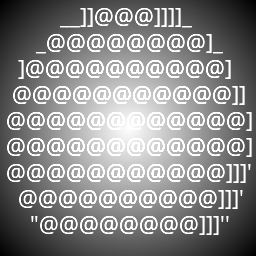

In [7]:
text = greedy_algorithm(proc_img, CHAR_SET, FONT)
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.6016661999272366


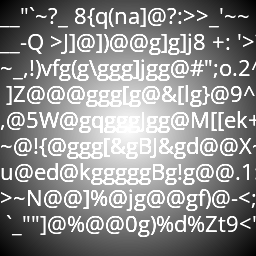

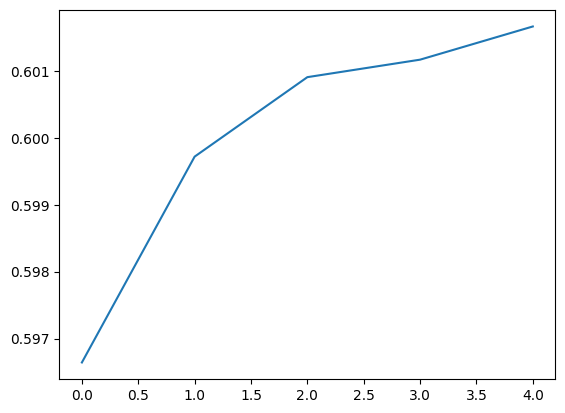

__"`~?_ 8{q(na]@?:>>_'~~ 
__-Q >J]@])@@g]g]j8 +: '>
~_,!)vfg(g\ggg]jgg@#";o.2
 ]Z@@@ggg[g@&[lg}@9
,@5W@gqgggJgg@M[[ek
~@!{@ggg[&gBJ&gd@@X
u@ed@kgggggBg!g@@.1
>~N@@]%@jg@@gf)@-<
 `_""]@%@@0g)%d%Zt9<"

0.6019294289981618


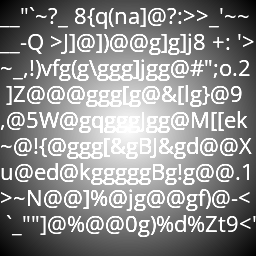

In [8]:
line_finders = [HarmonyLineSearch(line, CHAR_SET, FONT, 15, 0.9, 0.3, len(CHAR_SET)//4, False) for line in all_lines]
phs = pool_evolutionary_search(HarmonyLineSearch, line_finders, 1000, CHAR_SET)

res_history = []
for i in range(5):
    text = next(phs)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.5956538181678921


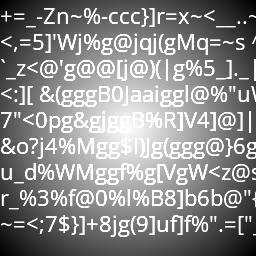

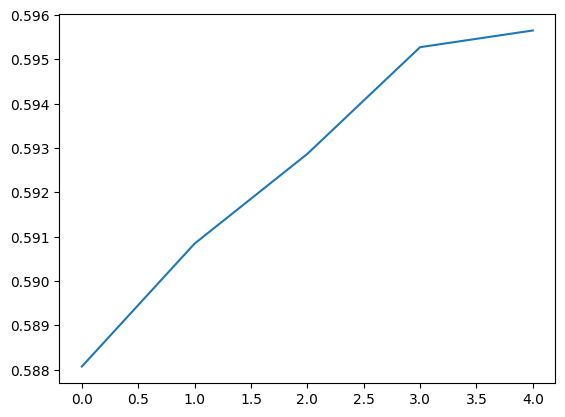

+=_-Zn~%-ccc}]r=x~<__..
<,=5]'Wj%g@jqj(gMq=~s ^
`_z<@'g@@[j@)(|g%5_]._|
<:][ &(gggB0Jaaiggl@%"u
7"<0pg&gjggB%R]V4]@]|
&o?j4%Mgg$I)Jg(ggg@}6
u_d%WMggf%g[VgW<z@
r_%3%f@0%l%B8]b6b@"
~=<;7$}]+8jg(9]uf]f%".=["

0.5962989956724878


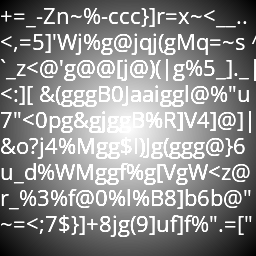

In [9]:
line_finders = [GeneticLineSearch(line, CHAR_SET, FONT, 100, 0.3, len(CHAR_SET)//4, False) for line in all_lines]
pgs = pool_evolutionary_search(GeneticLineSearch, line_finders, 12, CHAR_SET)

res_history = []
for i in range(5):
    text = next(pgs)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

4 0.5896228865081189


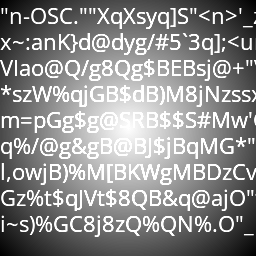

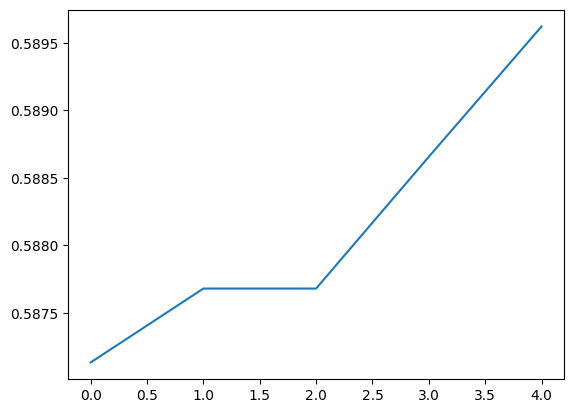

"n-OSC.""XqXsyq]S"<n>'_
x~:anK}d@dyg/#5`3q];<un
VIao@Q/g8Qg$BEBsj@+"V
*szW%qjGB$dB)M8jNzssx
m=pGg$g@SRB$$S#Mw'
q%/@g&gB@BJ$jBqMG*
l,owjB)%M[BKWgMBDzC
Gz%t$qJVt$8QB&q@ajO"f
i~s)%GC8j8zQ%QN%.O"_B

0.5899213005514705


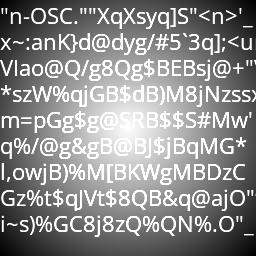

In [10]:

line_finders = [ParticleSwarmLineSearch(line, CHAR_SET, FONT, 100, 0.3, 2, 1, False) for line in all_lines]
pps = pool_evolutionary_search(ParticleSwarmLineSearch, line_finders, 10, CHAR_SET)
res_history = []
for i in range(5):
    text = next(pps)
    clear_output()
    res_history.append(evaluate_text_arr(text, proc_img, FONT))
    print(i, res_history[-1])
    bg_img, draw = new_img_draw(proc_img.size)
    draw_text_arr(draw, text, FONT)
    display(ImageChops.add(proc_img, bg_img))
    plt.plot(res_history)
    plt.show()

for i in range(len(text)):
    text[i] = text[i][:find_end_of_line(text[i], proc_img, FONT)] + '\n'
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)


In [11]:
W_H_WIN_SHAPE = (FONT.size, FONT.size)
char_to_brightness_map = generate_non_mono_multi_char_brightness_map(CHAR_SET, FONT, W_H_WIN_SHAPE[0], W_H_WIN_SHAPE[1], normalize=True, prune=0.8)
print(len(char_to_brightness_map))

204


            >j@@.           
      >j@@@@@@.     
   >j@@@@@@@@.  
   @@@@@@@@@@
  )@@@@@@@@@@
>[@@@@@@@@@@
>[@@@@@@@@@@
  '@@@@@@@@@@
   @@@@@@@@@j>
     '@@@@@@@@   
        '`?@@@@"`'      



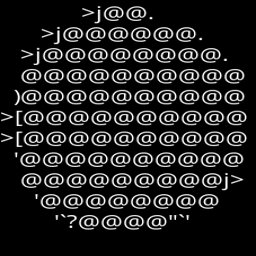

0.5989306281594668


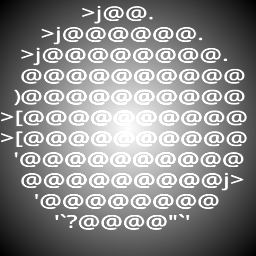

In [12]:
text = quantize_grayscale_wxh(proc_img, char_to_brightness_map, (W_H_WIN_SHAPE[1], W_H_WIN_SHAPE[0]), DITHER_MODES.FS, 0.0)

num_lines = len(text)
for i in range(len(text)):
    text[i] = ''.join(text[i]) + '\n'
text = ''.join(text)
print(text)

text_box = FONT.getbbox(text)
bg_img, draw = new_img_draw((int(text_box[2]/num_lines), text_box[3]*num_lines))
draw_text_arr(draw, text, FONT)
bg_img = bg_img.resize(proc_img.size)
display(bg_img)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)

            +]+]@@]?.           
      +]@@@@@@@]?      
   +]@@@@@@@@@]?   
  '+]@@@}Jj}Jj}Jj@@@@'  
+]@@@}Jj}Jj}Jj}Jj}Jj@@@
+]@@@}Jj}Jj}Jj}Jj}Jj@@@
  '@@@@}Jj}Jj}Jj@@@@
   +]@@@@@@@@@]?'  
     '+]@@@@@@@]?"''   

0.6052955777037378


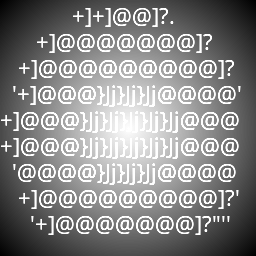

In [13]:
palette = list(char_to_brightness_map.keys())
text = greedy_algorithm(proc_img, palette, FONT)
print(''.join(text))

bg_img, draw = new_img_draw(proc_img.size)
draw_text_arr(draw, text, FONT)
print(evaluate_text_arr(text, proc_img, FONT))
ImageChops.add(proc_img, bg_img)